In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data['Churn'].value_counts()/len(data)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Type of TotalCharges is not float64, which means that it consists of string values.

In [6]:
def plot_perct_count(feature_name):
    order = sorted(data[feature_name].unique())
    ax = sns.countplot(x = feature_name, hue = 'Churn', data=data, order = order)

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        perct_l = height_l/total
        perct_r = height_r/total
    
        ax.text(left.get_x()+left.get_width()/2., height_l+20, '{0:.2%}'.format(perct_l), ha='center')
        ax.text(right.get_x()+right.get_width()/2., height_r+20, '{0:.2%}'.format(perct_r), ha='center')

## Gender and Age

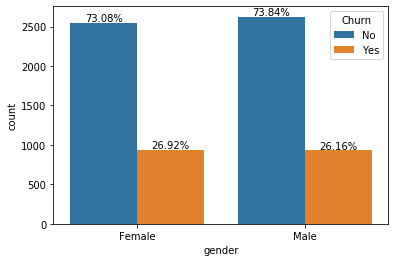

In [7]:
plot_perct_count('gender')
plt.show()

The Gender distribution is very similar between churned and non-churned groups. 

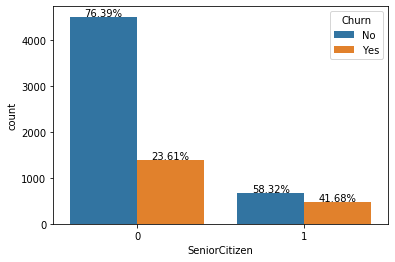

In [8]:
plot_perct_count('SeniorCitizen')
plt.show()

Senior citizens are more likely to churn than non senior citizens.

## Family Infomation

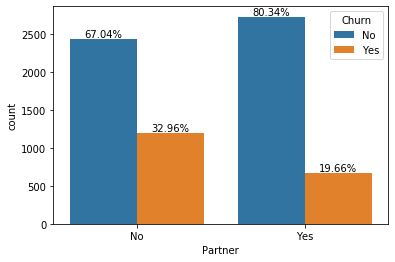

In [9]:
plot_perct_count('Partner')

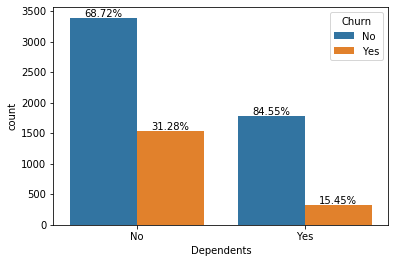

In [10]:
plot_perct_count('Dependents')

Customers who live independently (without partners or dependents) have a higher possibility to churn compared to customers who live with others.

## Tenure

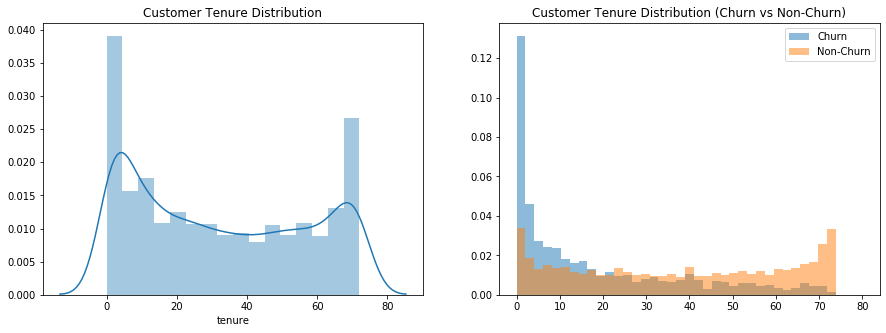

In [11]:
f, ax = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['tenure'], hist=True, ax=ax[0])
ax[0].set_title('Customer Tenure Distribution')

bins = np.linspace(0,80,40)
ax[1].hist(data[data['Churn'] == 'Yes']['tenure'], bins, alpha = 0.5, 
         density = True,label = 'Churn')
ax[1].hist(data[data['Churn'] == 'No']['tenure'], bins, alpha = 0.5, 
         density = True,label = 'Non-Churn')
ax[1].legend(loc = 'upper right')
ax[1].set_title('Customer Tenure Distribution (Churn vs Non-Churn)')

plt.show()

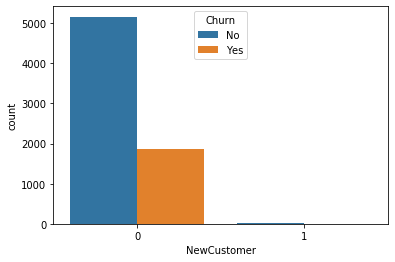

In [12]:
data.loc[:,'NewCustomer'] = np.where(data['tenure'] == 0,1,0)
sns.countplot(x='NewCustomer',hue='Churn',data=data)
plt.show()

Tenure is the number of months the customer has stayed with the company. Compared to other numberic feature, Tenure has a different U-shape curve distribution. For churned customers, most of them churn in their first month. For non-churned customers, the distribution curve is more flat, and many are old customers that stayed from more than 60 months. If a customer stays with the company for more than 20 months, he/she will likely stay with the company for longer.

## Service Subscription

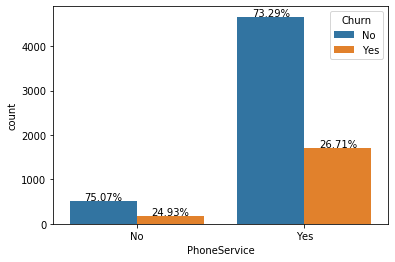

In [13]:
plot_perct_count('PhoneService')

In [14]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

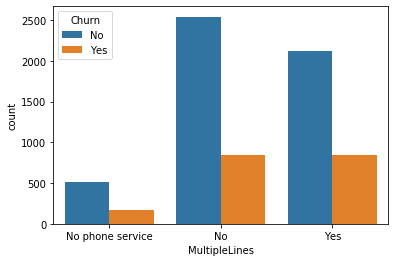

In [15]:
sns.countplot(x='MultipleLines', hue='Churn', data=data)
plt.show()

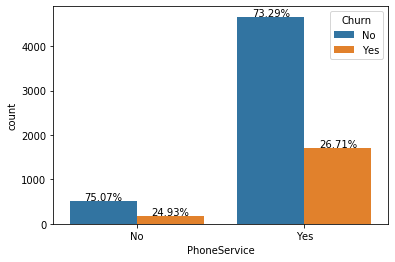

In [16]:
data['PhoneService'] = data['MultipleLines'].replace({'No': 'Yes'})
data['PhoneService'] = data['PhoneService'].replace({'No phone service': 'No'})
plot_perct_count('PhoneService')

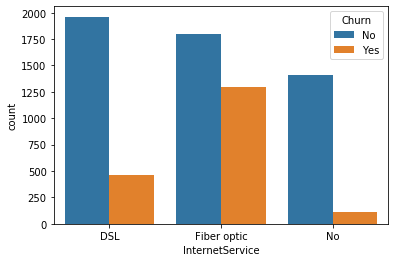

In [17]:
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.show()

In [18]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
    data[col] = data[col].replace({'No internet service': 'No'})

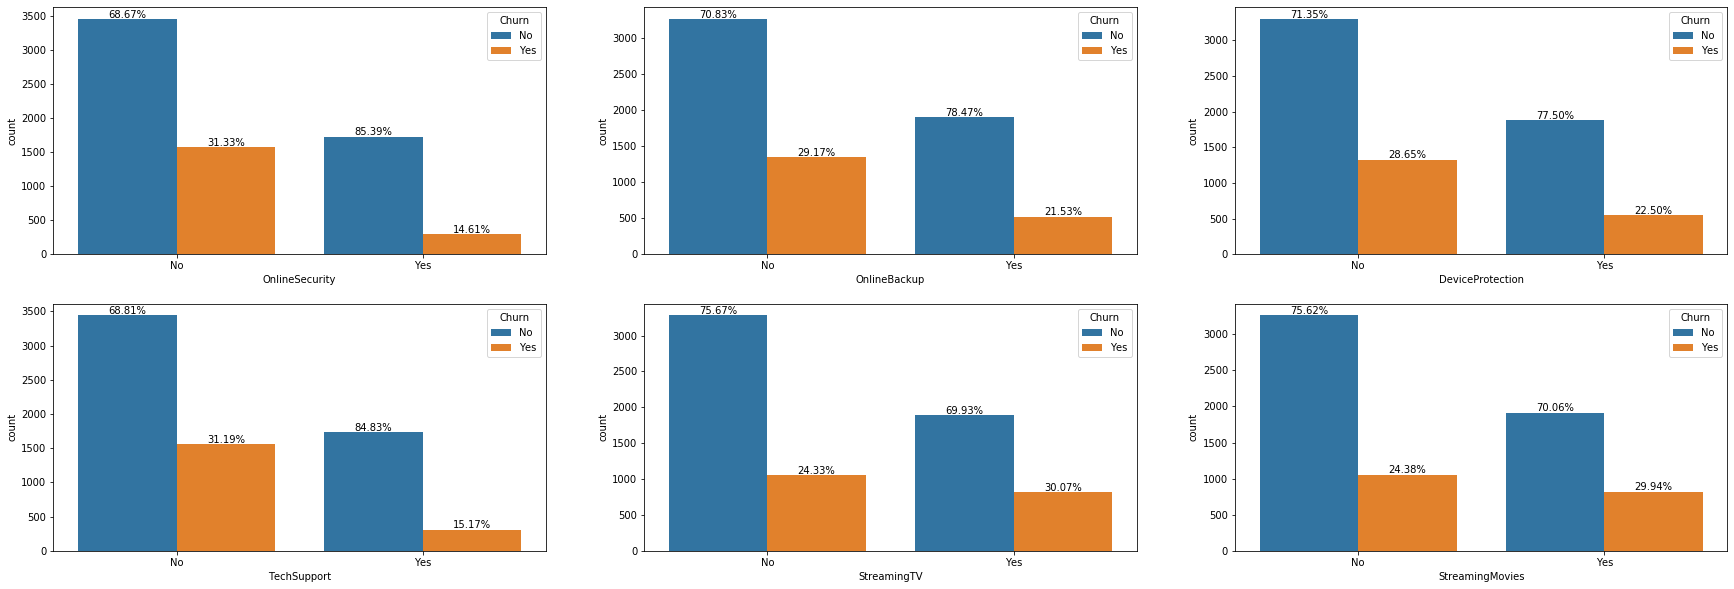

In [19]:
f, axes = plt.subplots(2,3, figsize=(30,10))
for i in range(6):
    order = sorted(data[cols[i]].unique())
    ax = sns.countplot(x = cols[i], hue = 'Churn', data=data, order = order, ax = axes[i//3,i%3])

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        perct_l = height_l/total
        perct_r = height_r/total
    
        ax.text(left.get_x()+left.get_width()/2., height_l+20, '{0:.2%}'.format(perct_l), ha='center')
        ax.text(right.get_x()+right.get_width()/2., height_r+20, '{0:.2%}'.format(perct_r), ha='center')

From above plots, we can see that Online Security and Tech Support has a high impact on the charn possibility.

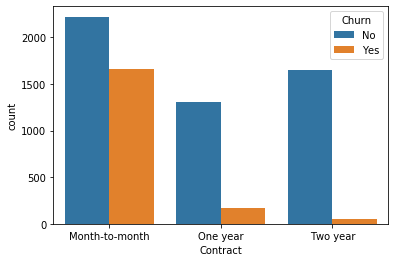

In [20]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.show()

Customers who have a long contract more than 1 year have low possibility to churn.

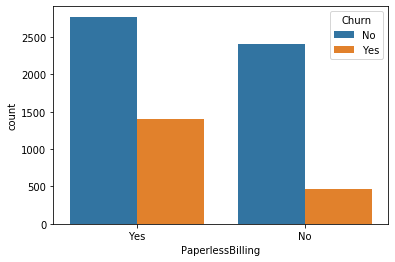

In [21]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=data)
plt.show()

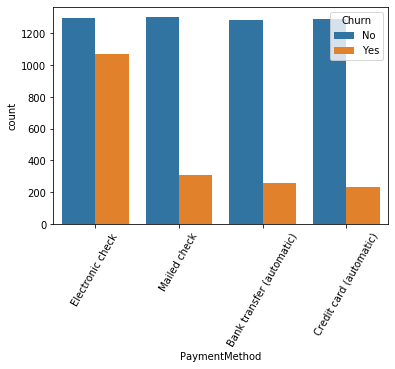

In [22]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.xticks(rotation=60)
plt.show()

Customers who use electronic check for payments are more likely to churn compared to customers who use other payment types.

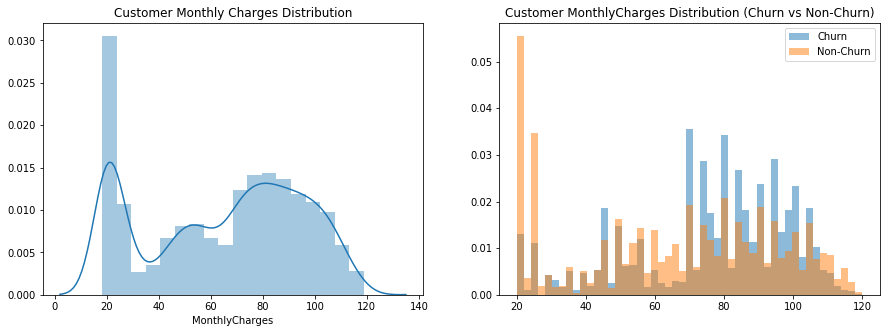

In [23]:
f, ax = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['MonthlyCharges'], hist=True, ax=ax[0])
ax[0].set_title('Customer Monthly Charges Distribution')

bins = np.linspace(20,120,50)
ax[1].hist(data[data['Churn'] == 'Yes']['MonthlyCharges'], bins, alpha = 0.5, 
         density = True,label = 'Churn')
ax[1].hist(data[data['Churn'] == 'No']['MonthlyCharges'], bins, alpha = 0.5, 
         density = True,label = 'Non-Churn')
ax[1].legend(loc = 'upper right')
ax[1].set_title('Customer MonthlyCharges Distribution (Churn vs Non-Churn)')

plt.show()

In [24]:
data['TotalCharges'] = data['TotalCharges'].replace({' ': 0})
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: float(x))

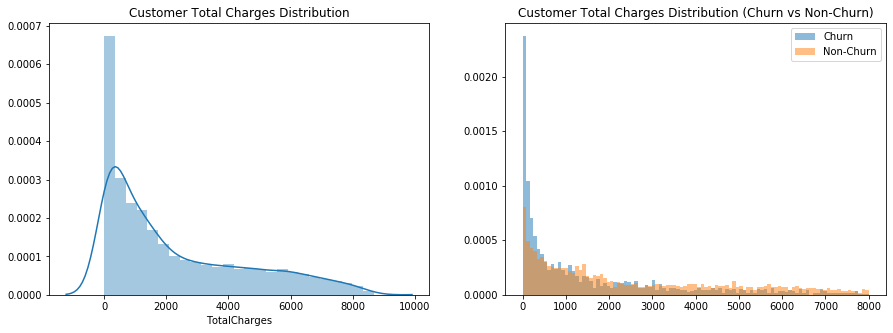

In [25]:
f, ax = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['TotalCharges'], hist=True, ax=ax[0])
ax[0].set_title('Customer Total Charges Distribution')

bins = np.linspace(0,8000,100)
ax[1].hist(data[data['Churn'] == 'Yes']['TotalCharges'], bins, alpha = 0.5, 
         density = True,label = 'Churn')
ax[1].hist(data[data['Churn'] == 'No']['TotalCharges'], bins, alpha = 0.5, 
         density = True,label = 'Non-Churn')
ax[1].legend(loc = 'upper right')
ax[1].set_title('Customer Total Charges Distribution (Churn vs Non-Churn)')

plt.show()

The Total Charges has a long tail and the difference between two groups are not very clear. Therefore we take a log on the total charges and examine the distributions again.

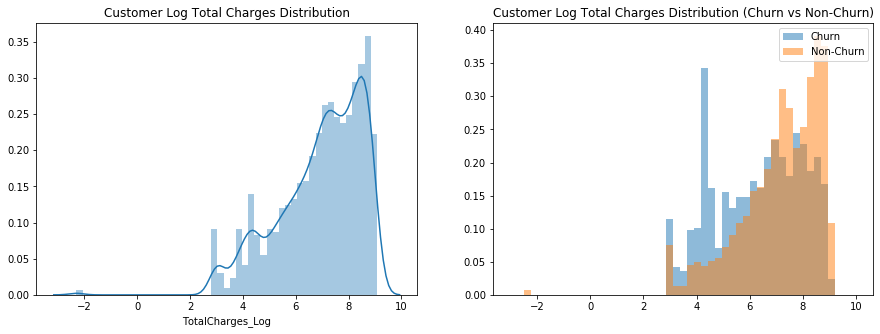

In [26]:
data['TotalCharges_Log'] = data['TotalCharges'].apply(lambda x: np.log(x+0.1))
f, ax = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['TotalCharges_Log'], hist=True, ax=ax[0])
ax[0].set_title('Customer Log Total Charges Distribution')

bins = np.linspace(-3,10,50)
ax[1].hist(data[data['Churn'] == 'Yes']['TotalCharges_Log'], bins, alpha = 0.5, 
         density = True,label = 'Churn')
ax[1].hist(data[data['Churn'] == 'No']['TotalCharges_Log'], bins, alpha = 0.5, 
         density = True,label = 'Non-Churn')
ax[1].legend(loc = 'upper right')
ax[1].set_title('Customer Log Total Charges Distribution (Churn vs Non-Churn)')

plt.show()

The difference is more obvious between two groups and it doesn't have the long tail anymore.

In [27]:
data['AverageCharge'] = data['TotalCharges']/data['tenure']
data['AverageCharge'] = data['AverageCharge'].fillna(0)

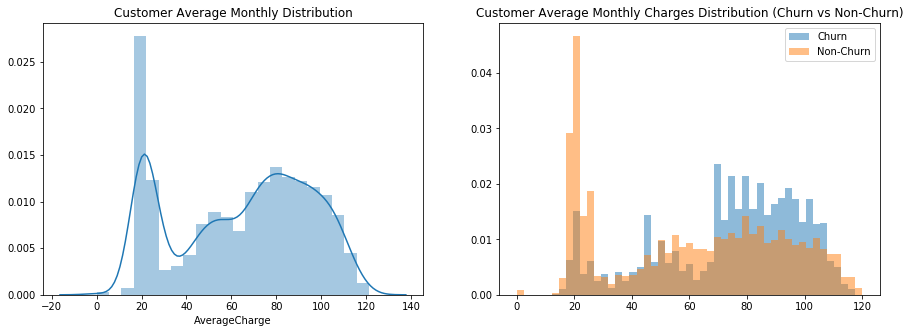

In [28]:
f, ax = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['AverageCharge'], hist=True, ax=ax[0])
ax[0].set_title('Customer Average Monthly Distribution')

bins = np.linspace(0,120,50)
ax[1].hist(data[data['Churn'] == 'Yes']['AverageCharge'], bins, alpha = 0.5, 
         density = True,label = 'Churn')
ax[1].hist(data[data['Churn'] == 'No']['AverageCharge'], bins, alpha = 0.5, 
         density = True,label = 'Non-Churn')
ax[1].legend(loc = 'upper right')
ax[1].set_title('Customer Average Monthly Charges Distribution (Churn vs Non-Churn)')

plt.show()

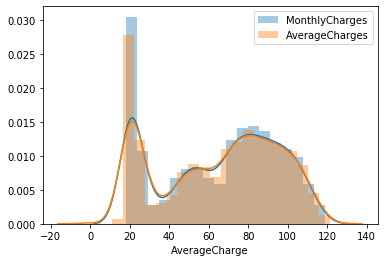

In [29]:
f,ax = plt.subplots()
sns.distplot(data['MonthlyCharges'],hist=True, label='MonthlyCharges',ax=ax)
sns.distplot(data['AverageCharge'], hist=True, label='AverageCharges',ax=ax)
ax.legend(loc = 'upper right')
plt.show()

Since these two variables have very similar distribution, we wil only use one of them.

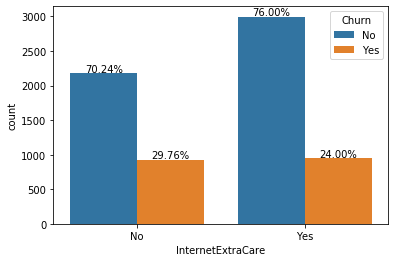

In [30]:
# Feature Interaction
data.loc[:,'InternetExtraCare'] = np.where((data['OnlineBackup'] == 'Yes') |(data['DeviceProtection'] == 'Yes') |(data['TechSupport'] == 'Yes'), 'Yes','No')
plot_perct_count('InternetExtraCare')

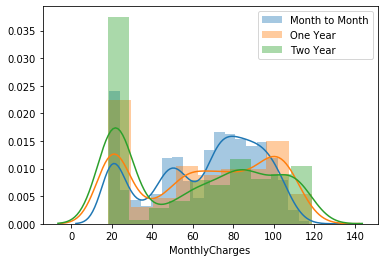

In [31]:
# Contract Type and Monthly Charges
# Monthly Charges Distributions by Contract Type
f,ax = plt.subplots()
sns.distplot(data[data['Contract']=='Month-to-month']['MonthlyCharges'], label='Month to Month',ax=ax)
sns.distplot(data[data['Contract']=='One year']['MonthlyCharges'],  label='One Year',ax=ax)
sns.distplot(data[data['Contract']=='Two year']['MonthlyCharges'], label='Two Year',ax=ax)
ax.legend(loc = 'upper right')
plt.show()

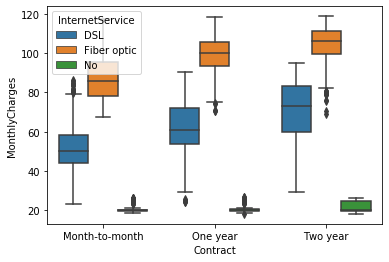

In [32]:
sns.boxplot(x = 'Contract', y='MonthlyCharges', hue='InternetService', data=data)
plt.show()

The value of Monthly Charge is mainly based on the contract and internet service provider. Customers who have a longer period of contract type are more loyal to the company. Customers who use Fibe Optic for internet provider need to pay higher monthly fee than those who use DSL. Customers who use Fiber optic may have higher expectations for their home internet speed and supposely are more sensitive to service quality.

# Feature Engineering

* Categorical Variable
    * Gender 
    * **Senior Citizen**
    * **Partner**
    * **Dependents**
    * **Contract**
    * **PhoneService**
    * **MultipleLines**
    * **InternetService**
    * **OnlineSecurity**
    * OnlineBackup
    * DeviceProtection
    * **TechSupport**
    * StreamingTV
    * StreamingMovies
    * **Paperless Billing**
    * **PaymentMethod**
    * New Customer
    * InternetExtraCare
* Numerical Variable
    * **Tenure**
    * **Monthly Charges**
    * **Total Charges**
    * **Log Total Charges**
    * **Average Charges**

Variables marked in bold have a stronger correlation with the target.

In [33]:
# Transform dummy categorical variables to 1/0 instead of Y/N
data_dummy_category = data[['gender','SeniorCitizen','Partner','Dependents','PhoneService',
             'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
             'StreamingTV','StreamingMovies','PaperlessBilling','NewCustomer','InternetExtraCare']].replace({'Yes': 1, 'No': 0, 'Female':1, 'Male':0})

In [34]:
data_dummy_category.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,NewCustomer,InternetExtraCare
0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,1,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [35]:
# Create Numeric Feature
# We want create a feature that describes the customer's purchasing/consuming power comparing to others in each group
# For Each Group (by Contract and group), calculate the difference to the group mean
for cat in data_dummy_category.columns:
    data_dummy_category[str(cat)+'_diff_mean'] = data['MonthlyCharges'] / data.groupby(['Contract','InternetService',cat])['MonthlyCharges'].transform('mean')
    data_dummy_category[str(cat)+'_diff_std'] = data['MonthlyCharges'] / data.groupby(['Contract','InternetService',cat])['MonthlyCharges'].transform('std')

In [36]:
data_dummy_category.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,StreamingTV_diff_mean,StreamingTV_diff_std,StreamingMovies_diff_mean,StreamingMovies_diff_std,PaperlessBilling_diff_mean,PaperlessBilling_diff_std,NewCustomer_diff_mean,NewCustomer_diff_std,InternetExtraCare_diff_mean,InternetExtraCare_diff_std
0,1,0,1,0,0,0,1,0,0,0,...,0.631727,2.547314,0.629994,2.538539,0.590869,2.310374,0.594391,2.290901,0.550110,2.314952
1,0,0,0,0,1,1,0,1,0,0,...,1.022856,4.525806,1.030397,4.533459,0.943232,4.006515,0.927573,4.077507,0.911579,4.199706
2,0,0,0,0,1,1,1,0,0,0,...,1.139647,4.595406,1.136521,4.579575,1.065939,4.167961,1.072293,4.132831,0.992410,4.176220
3,0,0,0,0,0,1,0,1,1,0,...,0.759733,3.361573,0.765335,3.367257,0.700592,2.975866,0.688962,3.028596,0.677081,3.119360
4,1,0,0,0,1,0,0,0,0,0,...,0.890142,9.450126,0.889308,9.170660,0.807288,6.287767,0.812446,6.313616,0.880088,8.011627


In [37]:
#Transform multi-category variables to dummy variables
data_multi_category = pd.get_dummies(data[['Contract', 'PaymentMethod','InternetService']])
data_multi_category.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,1,1,0,0
3,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_scale = scaler.fit_transform(data[['tenure','MonthlyCharges','TotalCharges','TotalCharges_Log']])
num_scale = pd.DataFrame(num_scale,columns=['tenure','MonthlyCharges','TotalCharges','TotalCharges_Log'])

In [39]:
y = data['Churn'].replace({'Yes':1,'No':0})
X = pd.concat([data_dummy_category, data_multi_category, num_scale],axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges,TotalCharges,TotalCharges_Log
0,1,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,-1.277445,-1.160323,-0.992611,-2.212693
1,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0.066327,-0.259629,-0.172165,0.388255
2,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,0,0,-1.236724,-0.362660,-0.958066,-1.406343
3,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0.514251,-0.746535,-0.193672,0.371852
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,-1.236724,0.197365,-0.938874,-1.194361


In [40]:
X.isna().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
NewCustomer                                0
InternetExtraCare                          0
gender_diff_mean                           0
gender_diff_std                            0
SeniorCitizen_diff_mean                    0
SeniorCitizen_diff_std                     0
Partner_diff_mean                          0
Partner_diff_std                           0
Dependents_diff_mean                       0
Dependents_diff_std                        0
PhoneServi

In [41]:
X['NewCustomer_diff_std'] = X['NewCustomer_diff_std'].fillna(-99)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(4930, 56)
(2113, 56)


# Prediction

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [44]:
#logistic regression
lr_mod = LogisticRegression(solver = 'liblinear')
result = lr_mod.fit(X_train, y_train)
predicted_y = lr_mod.predict(X_test)

In [45]:
def calc_score(y_true, y_pred, model_name):
    precision, recall, fscore, support = score(y_true, y_pred, pos_label = 1, average = 'binary')
    accuracy = (y_true == y_pred).sum()/len(y_true)
    print('{}\naccuracy:{:.3f}/precision:{:.3f}/recall:{:.3f}/fscore:{:.3f}'.format(model_name,accuracy,precision,recall,fscore))

In [46]:
calc_score(y_test, predicted_y, 'Logistic Regression:')

Logistic Regression:
accuracy:0.805/precision:0.679/recall:0.531/fscore:0.596


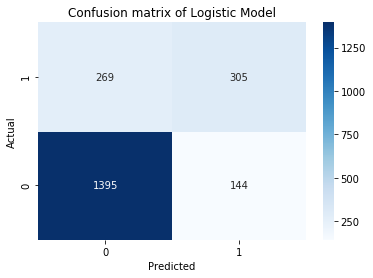

In [47]:
cf_matrix = confusion_matrix(y_test, predicted_y)
f,ax=plt.subplots()
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Logistic Model")
plt.show()

In [48]:
# Variable Importance in Logistic Model
weights = pd.DataFrame({'coef':lr_mod.coef_[0], 
                                 'variable': X.columns.values, 
                                 'abs_coef': abs(lr_mod.coef_[0])})
weights = weights.sort_values(by=['abs_coef'],ascending=False)

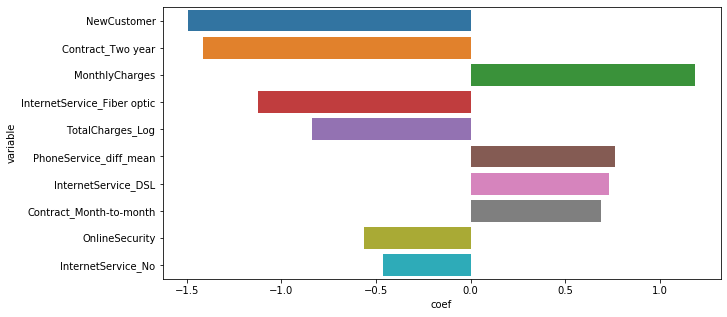

In [49]:
f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='coef',y = 'variable', data=weights.head(10),ax=ax)
plt.show()

In [51]:
# SMOTE for oversampling
from imblearn.over_sampling import SMOTE

In [52]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2, sampling_strategy=0.6)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1295
Before OverSampling, counts of label '0': 3635 

After OverSampling, the shape of train_X: (5816, 56)
After OverSampling, the shape of train_y: (5816,) 

After OverSampling, counts of label '1': 2181
After OverSampling, counts of label '0': 3635


In [53]:
result = lr_mod.fit(X_train_res, y_train_res)
predicted_y = lr_mod.predict(X_test)
calc_score(y_test, predicted_y, 'Logistic Regression (Oversampling)')

Logistic Regression (Oversampling)
accuracy:0.797/precision:0.611/recall:0.702/fscore:0.653


If we apply oversampling on the training data, the accuracy and precision is lower, however, the recall score is higher. It means that the model is more aggressive in predicting the churn.

### Feature Selection

In [54]:
#remove some variables
columns_drop = weights.variable[-15:]

In [55]:
X_train = X_train.drop(columns_drop, axis=1)
X_test = X_test.drop(columns_drop, axis=1)
X_train.head()

,SeniorCitizen,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges,TotalCharges,TotalCharges_Log
1695,0,1,1,0,1,0,1,1,0,1,...,0,0,0,1,0,0,0.880735,0.197365,0.657480,0.821728
1095,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,-1.277445,0.524739,-0.970243,-1.591047
3889,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,-0.788800,-1.510962,-0.891227,-0.857061
3667,1,1,1,0,0,1,0,1,1,1,...,0,0,0,0,1,0,-0.340876,1.056514,-0.007184,0.501571
2902,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,-1.073843,0.310367,-0.806850,-0.510810


In [59]:
# Logistic model
lr_mod = LogisticRegression(solver = 'liblinear')
param = {'C': [0.5, 0.8, 1, 1.5]}
gs_lr = GridSearchCV(lr_mod, param, cv=3)
gs_lr_fit = gs_lr.fit(X_train, y_train)
lr_top2 = pd.DataFrame(gs_lr_fit.cv_results_).sort_values(by='mean_test_score', ascending=False)[0:2]

In [60]:
lr_top2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,0.026969,0.000981,0.001301,0.000055,1,{'C': 1},0.815693,0.797445,0.799635,0.804260,0.008137,1
3,0.029304,0.003388,0.001303,0.000039,1.5,{'C': 1.5},0.814477,0.797445,0.800244,0.804057,0.007458,2


In [62]:
lr_mod = LogisticRegression(solver = 'liblinear', C=1)
lr_mod.fit(X_train, y_train)
predicted_y_lr = lr_mod.predict(X_test)
calc_score(y_test, predicted_y_lr, 'Logistic Regression')

Logistic Regression
accuracy:0.805/precision:0.685/recall:0.526/fscore:0.595


In [63]:
# random forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [64]:
rf_mod = RandomForestClassifier(random_state=42)
param = {'n_estimators':[200,500],
        'max_depth': [20, 50, None]}

In [65]:
gs_rf = GridSearchCV(rf_mod, param, cv=3)
gs_rf_fit = gs_rf.fit(X_train, y_train)
rf_top2 = pd.DataFrame(gs_rf_fit.cv_results_).sort_values(by='mean_test_score', ascending=False)[0:2]

In [66]:
rf_top2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,1.226922,0.030540,0.050310,0.002953,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.789538,0.786496,0.788063,0.788032,0.001242,1
4,1.196639,0.030421,0.047897,0.001223,None,200,"{'max_depth': None, 'n_estimators': 200}",0.789538,0.786496,0.788063,0.788032,0.001242,1


In [67]:
rf_mod = RandomForestClassifier(n_estimators = 200, max_depth=20, random_state=42)
rf_mod.fit(X_train, y_train)
predicted_y_rf = rf_mod.predict(X_test)
calc_score(y_test, predicted_y_rf, 'Random Forest')

Random Forest
accuracy:0.784/precision:0.632/recall:0.491/fscore:0.553


In [68]:
# XGBoost
gb = GradientBoostingClassifier(random_state=42)
param = {'n_estimators':[200, 300],
        'learning_rate': [0.1, 0.3]}
gs_gb = GridSearchCV(gb, param, cv=5)
gs_fit_gb = gs_gb.fit(X_train, y_train)
gb_top5 = pd.DataFrame(gs_fit_gb.cv_results_).sort_values(by='mean_test_score', ascending=False)[0:5]

In [69]:
gb_top5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.282127,0.049819,0.004127,0.000983,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.798174,0.795132,0.793103,0.781947,0.794118,0.792495,0.005540,1
1,1.912664,0.025582,0.004632,0.000530,0.1,300,"{'learning_rate': 0.1, 'n_estimators': 300}",0.796146,0.791075,0.784990,0.773834,0.789047,0.787018,0.007508,2
2,1.297568,0.034135,0.003432,0.000183,0.3,200,"{'learning_rate': 0.3, 'n_estimators': 200}",0.786004,0.777890,0.775862,0.755578,0.772819,0.773631,0.010028,3
3,1.865829,0.046545,0.004369,0.000218,0.3,300,"{'learning_rate': 0.3, 'n_estimators': 300}",0.788032,0.763692,0.769777,0.761663,0.764706,0.769574,0.009609,4


In [70]:
gb_mod = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 200, random_state=42)
gb_mod.fit(X_train, y_train)
predicted_y_gb = gb_mod.predict(X_test)
calc_score(y_test, predicted_y_gb, 'XGBoost')

XGBoost
accuracy:0.799/precision:0.666/recall:0.521/fscore:0.585


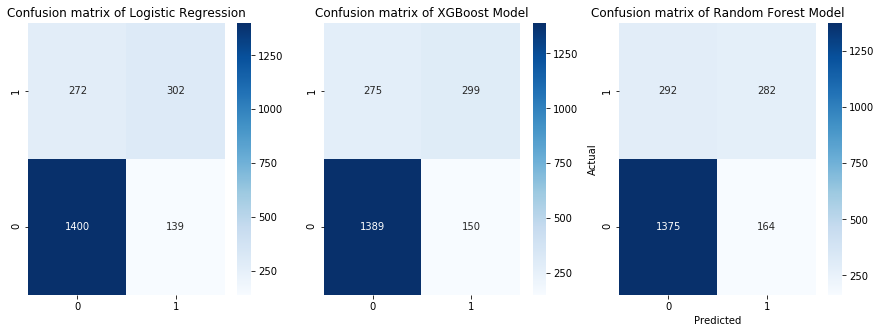

In [72]:
cf_matrix_gb = confusion_matrix(y_test, predicted_y_gb)
cf_matrix_rf = confusion_matrix(y_test, predicted_y_rf)
cf_matrix_lr = confusion_matrix(y_test, predicted_y_lr)
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.heatmap(cf_matrix_lr, annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_ylim([0,2])
ax[0].set_title("Confusion matrix of Logistic Regression")
sns.heatmap(cf_matrix_gb, annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_ylim([0,2])
ax[1].set_title("Confusion matrix of XGBoost Model")
sns.heatmap(cf_matrix_rf, annot=True, fmt='d', cmap='Blues',ax=ax[2])
ax[2].set_ylim([0,2])
ax[2].set_title("Confusion matrix of Random Forest Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

From the confusion matrixes, we can see that XGBoost Model predicted more Non-Churn customer correctly, while Logisitic model performs better at correctly predicting churned customer. Can we use a simple voting classifier that predict 0 when XGBoost predicts 0 and use logistic regression's predictions on all other occasions to imporve accuracy?

In [82]:
voting_predicted_y = np.int64(np.logical_and(predicted_y_gb,predicted_y_lr))
calc_score(y_test, voting_predicted_y, '1.Voting Classifier')
calc_score(y_test, predicted_y_lr, '2.Logistic Regression')
calc_score(y_test, predicted_y_gb, '3.XGBoost')

1.Voting Classifier
accuracy:0.800/precision:0.704/recall:0.455/fscore:0.552
2.Logistic Regression
accuracy:0.805/precision:0.685/recall:0.526/fscore:0.595
3.XGBoost
accuracy:0.799/precision:0.666/recall:0.521/fscore:0.585


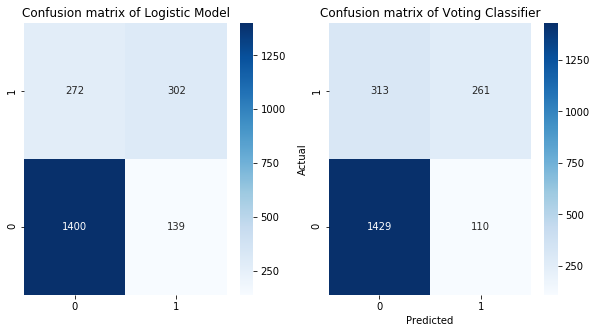

In [80]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(cf_matrix_lr, annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_ylim([0,2])
ax[0].set_title("Confusion matrix of Logistic Model")
cf_matrix_vt = confusion_matrix(y_test, voting_predicted_y)
sns.heatmap(cf_matrix_vt, annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_ylim([0,2])
ax[1].set_title("Confusion matrix of Voting Classifier")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Conclusion and Future Work

In this Notebook, we tried different models like logistic model, random forest, XGBoost, and different methods for feature engineering, such as variable interations, oversampling, feature selection, parameter tuning. The final winner is logistic regression model with an accuracy of 0.805. In order to get a better prediction on customer retention, more data about customers and their interactions with the company is needed, such as customers location, previous contact with the company, if in a promition campaign or not...etc. In addition, for new customers and customers we predict to churn, the company should send nurture emails to keep them with the company. It's ten time harder (even more) to gain new customers than keeping the old ones. Therefore, the company should on the one hand keep customers with a high propensity to churn stay and provide a loyalty program for customers who stay longer.